In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('data_unfiltered.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,1.058198e+07,7.784370e+05,2160
1,1,2,1.455325e+07,8.185857e+05,2160
2,2,3,1.446529e+07,1.205208e+06,2160
3,3,4,1.098314e+07,1.508179e+06,2160
4,4,5,5.832415e+06,7.187604e+05,2160
...,...,...,...,...,...
145,145,21,2.051503e+06,4.545315e+04,360
146,146,22,1.284383e+06,3.662261e+04,360
147,147,23,1.070837e+06,2.868816e+04,360
148,148,24,1.415124e+06,3.507011e+04,360


In [3]:
data = data.drop(columns=['Unnamed: 0', 'Video_number'])
data

,Density_burst,Density_throttling,Quality
0,1.058198e+07,7.784370e+05,2160
1,1.455325e+07,8.185857e+05,2160
2,1.446529e+07,1.205208e+06,2160
3,1.098314e+07,1.508179e+06,2160
4,5.832415e+06,7.187604e+05,2160
...,...,...,...
145,2.051503e+06,4.545315e+04,360
146,1.284383e+06,3.662261e+04,360
147,1.070837e+06,2.868816e+04,360
148,1.415124e+06,3.507011e+04,360


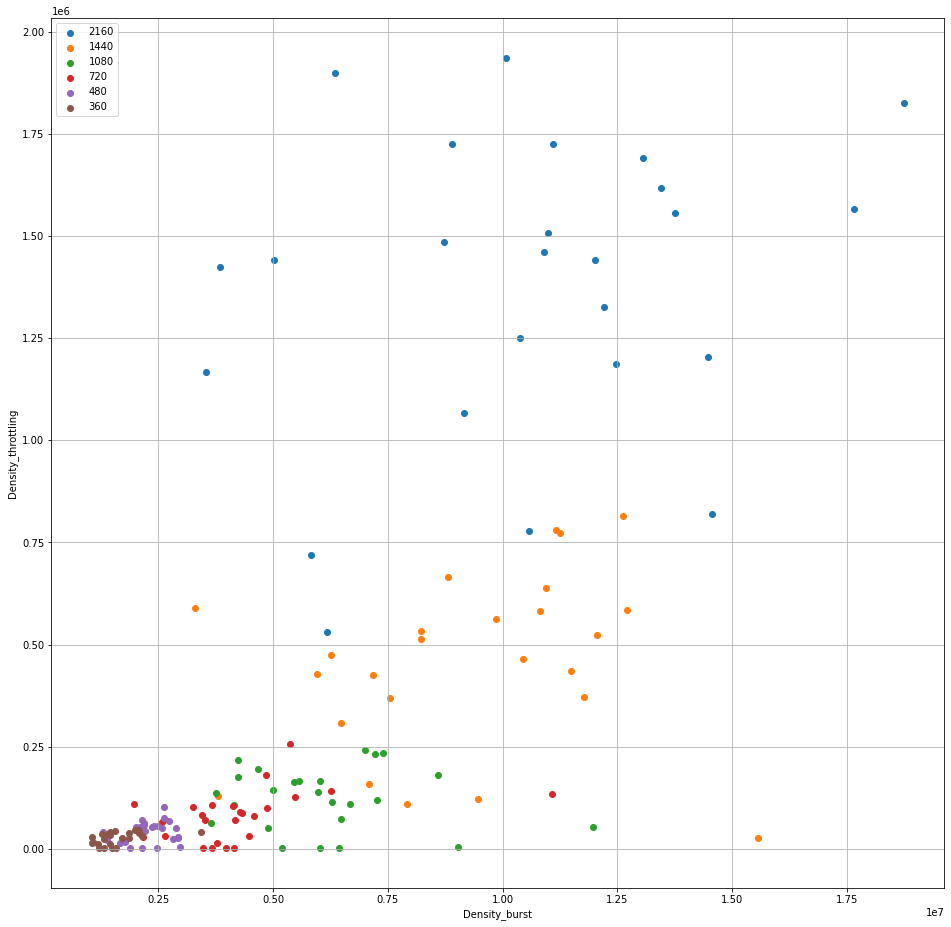

In [4]:
# Посмотрим на данные

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

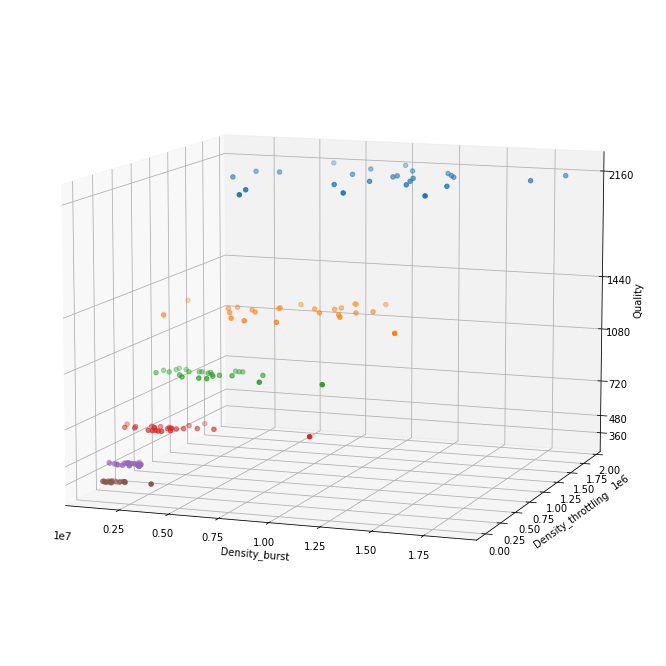

In [5]:
fig_3d = plt.figure(figsize=(12, 12))
ax = fig_3d.add_subplot(projection='3d')

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    z = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
            z.append(quality)
    ax.scatter(x, y, z)
    
ax.set_xlabel('Density_burst')
ax.set_ylabel('Density_throttling')
ax.set_zlabel('Quality')

ax.view_init(10,-70)

ax.set_zticks([360, 480, 720, 1080, 1440, 2160])

plt.grid(True)

plt.show()

In [6]:
data_shuffled = shuffle(data)
data_shuffled

,Density_burst,Density_throttling,Quality
109,1.778286e+06,16418.252066,480
101,1.894932e+06,1412.545455,480
122,1.290482e+06,40498.000000,480
65,6.017106e+06,165147.372188,1080
116,2.145144e+06,70891.201597,480
...,...,...,...
56,6.274639e+06,115302.200000,1080
32,7.095594e+06,157798.137441,1440
98,4.281064e+06,89452.586626,720
26,1.556401e+07,27390.000000,1440


In [7]:
# Пробуем обычный KNN

X = data_shuffled[['Density_burst', 'Density_throttling']]
y = data_shuffled['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.5933333333333334
2   0.6133333333333333
3   0.6533333333333332
4   0.6266666666666667
5   0.6266666666666667
6   0.6133333333333334
7   0.6133333333333333
8   0.6266666666666666
9   0.6399999999999999
10  0.6199999999999999
11  0.6066666666666667
12  0.6066666666666667
13  0.58
14  0.5733333333333334
15  0.6
16  0.58
17  0.58
18  0.5866666666666666
19  0.5933333333333334
20  0.5733333333333335
21  0.6066666666666667
22  0.6
23  0.62
24  0.6066666666666667
25  0.5933333333333334
26  0.5933333333333334
27  0.5800000000000001
28  0.58
29  0.5866666666666667


In [8]:
# Лучшее значение -- 0.6533333333333332 для n = 3

In [9]:
# Нужно нормализовать данные

data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Density_burst,Density_throttling,Quality
109,0.040554,0.007940,480
101,0.047155,0.000188,480
122,0.012949,0.020379,480
65,0.280433,0.084772,1080
116,0.061315,0.036080,480
...,...,...,...
56,0.295007,0.059023,1080
32,0.341466,0.080976,1440
98,0.182189,0.045669,720
26,0.820701,0.013608,1440


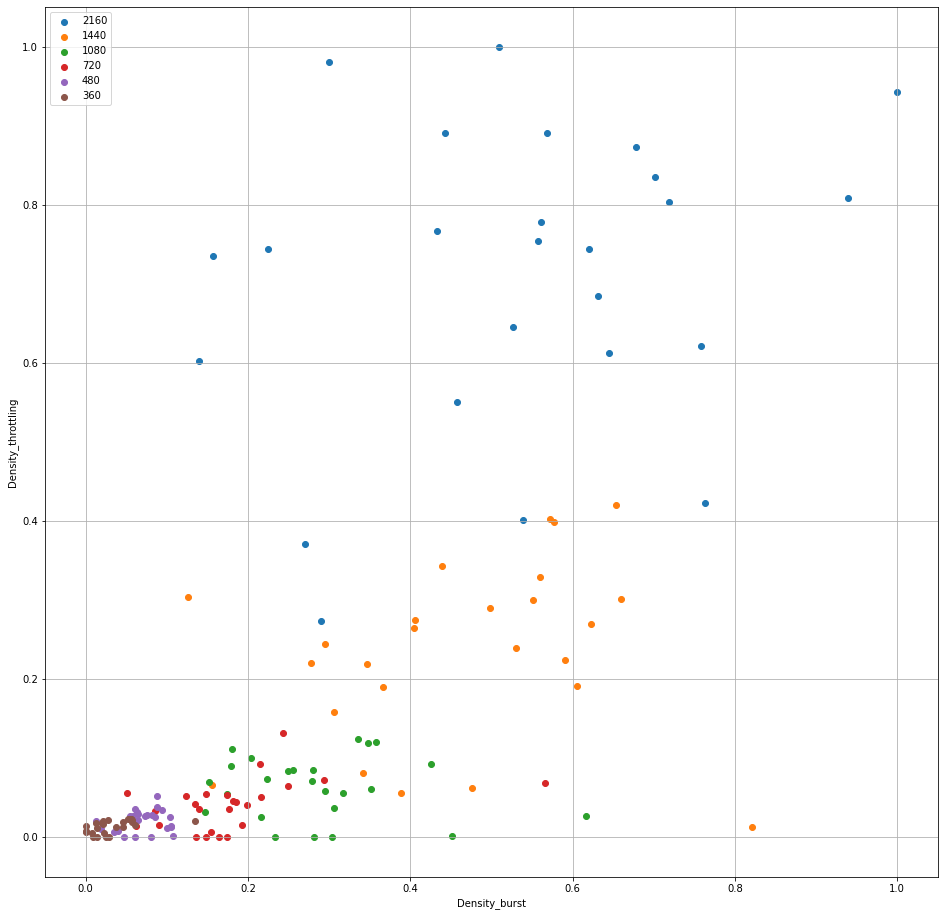

In [10]:
# Строим график ещё раз, теперь с нормализованными данными

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data_norm)):
        if data['Quality'][i] == quality:
            x.append(data_norm['Density_burst'][i])
            y.append(data_norm['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

In [11]:
# Не то чтобы много поменялось, но это поможет нам для дальнейшей работы с классификаторами

In [12]:
# Пробуем KNN, но теперь с нормализованными данными

X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.7
2   0.7066666666666667
3   0.7333333333333334
4   0.7533333333333333
5   0.76
6   0.7333333333333333
7   0.7466666666666667
8   0.7666666666666667
9   0.74
10  0.74
11  0.7466666666666666
12  0.7266666666666667
13  0.74
14  0.7266666666666667
15  0.72
16  0.7066666666666668
17  0.6933333333333332
18  0.6733333333333333
19  0.6866666666666666
20  0.6933333333333334
21  0.7133333333333334
22  0.7000000000000001
23  0.7066666666666668
24  0.7
25  0.7133333333333334
26  0.6933333333333332
27  0.7000000000000001
28  0.7000000000000001
29  0.7000000000000001


In [13]:
# Точность улучшилась -- теперь это 0.767 для n = 8 и других

In [29]:
# Пробуем CatBoost

model = CatBoostClassifier(iterations = 1000)
scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')

Learning rate set to 0.071445
0:	learn: 1.7026019	total: 1.04ms	remaining: 1.04s
1:	learn: 1.6297007	total: 2.31ms	remaining: 1.15s
2:	learn: 1.5748296	total: 3.34ms	remaining: 1.11s
3:	learn: 1.5140644	total: 4.38ms	remaining: 1.09s
4:	learn: 1.4484999	total: 5.47ms	remaining: 1.09s
5:	learn: 1.3990301	total: 6.57ms	remaining: 1.09s
6:	learn: 1.3486163	total: 7.68ms	remaining: 1.09s
7:	learn: 1.2997982	total: 8.98ms	remaining: 1.11s
8:	learn: 1.2470835	total: 9.95ms	remaining: 1.09s
9:	learn: 1.2092885	total: 10.9ms	remaining: 1.08s
10:	learn: 1.1755589	total: 11.8ms	remaining: 1.06s
11:	learn: 1.1496941	total: 12.7ms	remaining: 1.05s
12:	learn: 1.1187844	total: 13.7ms	remaining: 1.04s
13:	learn: 1.0886780	total: 14.7ms	remaining: 1.03s
14:	learn: 1.0532821	total: 15.7ms	remaining: 1.03s
15:	learn: 1.0255438	total: 16.6ms	remaining: 1.02s
16:	learn: 1.0017808	total: 17.6ms	remaining: 1.02s
17:	learn: 0.9835449	total: 18.6ms	remaining: 1.01s
18:	learn: 0.9590036	total: 19.6ms	remaining

186:	learn: 0.2821935	total: 190ms	remaining: 824ms
187:	learn: 0.2810276	total: 191ms	remaining: 824ms
188:	learn: 0.2799204	total: 192ms	remaining: 824ms
189:	learn: 0.2787588	total: 193ms	remaining: 823ms
190:	learn: 0.2779923	total: 194ms	remaining: 822ms
191:	learn: 0.2769088	total: 195ms	remaining: 821ms
192:	learn: 0.2761469	total: 196ms	remaining: 821ms
193:	learn: 0.2752763	total: 197ms	remaining: 820ms
194:	learn: 0.2742740	total: 198ms	remaining: 819ms
195:	learn: 0.2734645	total: 199ms	remaining: 818ms
196:	learn: 0.2724659	total: 201ms	remaining: 817ms
197:	learn: 0.2711275	total: 202ms	remaining: 817ms
198:	learn: 0.2702092	total: 203ms	remaining: 816ms
199:	learn: 0.2692730	total: 204ms	remaining: 816ms
200:	learn: 0.2680058	total: 205ms	remaining: 816ms
201:	learn: 0.2661963	total: 206ms	remaining: 815ms
202:	learn: 0.2652016	total: 207ms	remaining: 814ms
203:	learn: 0.2639767	total: 209ms	remaining: 814ms
204:	learn: 0.2633887	total: 210ms	remaining: 813ms
205:	learn: 

357:	learn: 0.1605409	total: 379ms	remaining: 679ms
358:	learn: 0.1600498	total: 380ms	remaining: 678ms
359:	learn: 0.1597255	total: 381ms	remaining: 677ms
360:	learn: 0.1593156	total: 382ms	remaining: 677ms
361:	learn: 0.1587756	total: 383ms	remaining: 676ms
362:	learn: 0.1585081	total: 385ms	remaining: 675ms
363:	learn: 0.1579641	total: 386ms	remaining: 674ms
364:	learn: 0.1576093	total: 387ms	remaining: 673ms
365:	learn: 0.1571158	total: 388ms	remaining: 672ms
366:	learn: 0.1567699	total: 389ms	remaining: 671ms
367:	learn: 0.1564262	total: 391ms	remaining: 671ms
368:	learn: 0.1560203	total: 392ms	remaining: 670ms
369:	learn: 0.1554948	total: 393ms	remaining: 669ms
370:	learn: 0.1549903	total: 394ms	remaining: 667ms
371:	learn: 0.1546020	total: 395ms	remaining: 667ms
372:	learn: 0.1541053	total: 396ms	remaining: 665ms
373:	learn: 0.1536212	total: 397ms	remaining: 664ms
374:	learn: 0.1533136	total: 398ms	remaining: 663ms
375:	learn: 0.1530392	total: 399ms	remaining: 662ms
376:	learn: 

547:	learn: 0.1026377	total: 570ms	remaining: 470ms
548:	learn: 0.1024526	total: 571ms	remaining: 469ms
549:	learn: 0.1022853	total: 572ms	remaining: 468ms
550:	learn: 0.1020773	total: 573ms	remaining: 467ms
551:	learn: 0.1018795	total: 575ms	remaining: 466ms
552:	learn: 0.1017133	total: 576ms	remaining: 465ms
553:	learn: 0.1015568	total: 577ms	remaining: 464ms
554:	learn: 0.1014488	total: 578ms	remaining: 463ms
555:	learn: 0.1012716	total: 579ms	remaining: 462ms
556:	learn: 0.1010980	total: 580ms	remaining: 461ms
557:	learn: 0.1009151	total: 581ms	remaining: 460ms
558:	learn: 0.1007829	total: 582ms	remaining: 459ms
559:	learn: 0.1006115	total: 583ms	remaining: 458ms
560:	learn: 0.1004458	total: 584ms	remaining: 457ms
561:	learn: 0.1002272	total: 585ms	remaining: 456ms
562:	learn: 0.1000530	total: 586ms	remaining: 455ms
563:	learn: 0.0998870	total: 587ms	remaining: 454ms
564:	learn: 0.0997058	total: 588ms	remaining: 453ms
565:	learn: 0.0995408	total: 589ms	remaining: 452ms
566:	learn: 

733:	learn: 0.0740394	total: 761ms	remaining: 276ms
734:	learn: 0.0739165	total: 762ms	remaining: 275ms
735:	learn: 0.0737774	total: 763ms	remaining: 274ms
736:	learn: 0.0737074	total: 764ms	remaining: 273ms
737:	learn: 0.0736027	total: 765ms	remaining: 272ms
738:	learn: 0.0734872	total: 766ms	remaining: 271ms
739:	learn: 0.0733661	total: 768ms	remaining: 270ms
740:	learn: 0.0732584	total: 769ms	remaining: 269ms
741:	learn: 0.0731625	total: 770ms	remaining: 268ms
742:	learn: 0.0730310	total: 771ms	remaining: 267ms
743:	learn: 0.0729558	total: 773ms	remaining: 266ms
744:	learn: 0.0728729	total: 774ms	remaining: 265ms
745:	learn: 0.0727255	total: 775ms	remaining: 264ms
746:	learn: 0.0726296	total: 776ms	remaining: 263ms
747:	learn: 0.0725151	total: 777ms	remaining: 262ms
748:	learn: 0.0724020	total: 778ms	remaining: 261ms
749:	learn: 0.0723231	total: 779ms	remaining: 260ms
750:	learn: 0.0722118	total: 781ms	remaining: 259ms
751:	learn: 0.0721233	total: 782ms	remaining: 258ms
752:	learn: 

894:	learn: 0.0589345	total: 946ms	remaining: 111ms
895:	learn: 0.0588632	total: 947ms	remaining: 110ms
896:	learn: 0.0587606	total: 948ms	remaining: 109ms
897:	learn: 0.0586943	total: 950ms	remaining: 108ms
898:	learn: 0.0586247	total: 951ms	remaining: 107ms
899:	learn: 0.0585377	total: 952ms	remaining: 106ms
900:	learn: 0.0584495	total: 953ms	remaining: 105ms
901:	learn: 0.0584049	total: 955ms	remaining: 104ms
902:	learn: 0.0583390	total: 956ms	remaining: 103ms
903:	learn: 0.0582544	total: 958ms	remaining: 102ms
904:	learn: 0.0581945	total: 959ms	remaining: 101ms
905:	learn: 0.0581083	total: 961ms	remaining: 99.7ms
906:	learn: 0.0580438	total: 962ms	remaining: 98.6ms
907:	learn: 0.0579822	total: 963ms	remaining: 97.6ms
908:	learn: 0.0579135	total: 964ms	remaining: 96.5ms
909:	learn: 0.0578455	total: 965ms	remaining: 95.5ms
910:	learn: 0.0577875	total: 966ms	remaining: 94.4ms
911:	learn: 0.0576880	total: 967ms	remaining: 93.3ms
912:	learn: 0.0576116	total: 969ms	remaining: 92.3ms
913:

188:	learn: 0.2986305	total: 191ms	remaining: 819ms
189:	learn: 0.2972072	total: 192ms	remaining: 819ms
190:	learn: 0.2958402	total: 193ms	remaining: 818ms
191:	learn: 0.2947267	total: 194ms	remaining: 816ms
192:	learn: 0.2937491	total: 195ms	remaining: 816ms
193:	learn: 0.2923276	total: 196ms	remaining: 815ms
194:	learn: 0.2907942	total: 197ms	remaining: 815ms
195:	learn: 0.2894846	total: 198ms	remaining: 813ms
196:	learn: 0.2885743	total: 200ms	remaining: 813ms
197:	learn: 0.2874024	total: 201ms	remaining: 813ms
198:	learn: 0.2865056	total: 202ms	remaining: 812ms
199:	learn: 0.2855967	total: 203ms	remaining: 811ms
200:	learn: 0.2844852	total: 204ms	remaining: 810ms
201:	learn: 0.2832721	total: 205ms	remaining: 810ms
202:	learn: 0.2822653	total: 207ms	remaining: 811ms
203:	learn: 0.2811716	total: 208ms	remaining: 811ms
204:	learn: 0.2799411	total: 209ms	remaining: 811ms
205:	learn: 0.2790880	total: 210ms	remaining: 811ms
206:	learn: 0.2780959	total: 211ms	remaining: 810ms
207:	learn: 

360:	learn: 0.1661243	total: 367ms	remaining: 649ms
361:	learn: 0.1657137	total: 368ms	remaining: 648ms
362:	learn: 0.1653481	total: 369ms	remaining: 648ms
363:	learn: 0.1648401	total: 370ms	remaining: 647ms
364:	learn: 0.1643775	total: 371ms	remaining: 646ms
365:	learn: 0.1640391	total: 372ms	remaining: 645ms
366:	learn: 0.1635034	total: 373ms	remaining: 644ms
367:	learn: 0.1631090	total: 374ms	remaining: 643ms
368:	learn: 0.1626678	total: 375ms	remaining: 642ms
369:	learn: 0.1622601	total: 376ms	remaining: 641ms
370:	learn: 0.1617663	total: 377ms	remaining: 640ms
371:	learn: 0.1613498	total: 379ms	remaining: 639ms
372:	learn: 0.1610367	total: 380ms	remaining: 638ms
373:	learn: 0.1607149	total: 381ms	remaining: 637ms
374:	learn: 0.1602676	total: 382ms	remaining: 636ms
375:	learn: 0.1598094	total: 383ms	remaining: 635ms
376:	learn: 0.1592195	total: 384ms	remaining: 634ms
377:	learn: 0.1588296	total: 385ms	remaining: 633ms
378:	learn: 0.1583148	total: 386ms	remaining: 632ms
379:	learn: 

544:	learn: 0.1057613	total: 556ms	remaining: 464ms
545:	learn: 0.1054392	total: 557ms	remaining: 463ms
546:	learn: 0.1052139	total: 558ms	remaining: 462ms
547:	learn: 0.1050593	total: 559ms	remaining: 461ms
548:	learn: 0.1048241	total: 560ms	remaining: 460ms
549:	learn: 0.1045802	total: 561ms	remaining: 459ms
550:	learn: 0.1043713	total: 562ms	remaining: 458ms
551:	learn: 0.1042216	total: 564ms	remaining: 457ms
552:	learn: 0.1039733	total: 565ms	remaining: 456ms
553:	learn: 0.1037473	total: 566ms	remaining: 455ms
554:	learn: 0.1036209	total: 567ms	remaining: 455ms
555:	learn: 0.1034241	total: 568ms	remaining: 454ms
556:	learn: 0.1032429	total: 569ms	remaining: 453ms
557:	learn: 0.1030811	total: 570ms	remaining: 452ms
558:	learn: 0.1028244	total: 571ms	remaining: 451ms
559:	learn: 0.1026598	total: 572ms	remaining: 450ms
560:	learn: 0.1024911	total: 573ms	remaining: 449ms
561:	learn: 0.1023260	total: 574ms	remaining: 448ms
562:	learn: 0.1020870	total: 575ms	remaining: 446ms
563:	learn: 

739:	learn: 0.0760278	total: 748ms	remaining: 263ms
740:	learn: 0.0758823	total: 749ms	remaining: 262ms
741:	learn: 0.0757183	total: 750ms	remaining: 261ms
742:	learn: 0.0756068	total: 751ms	remaining: 260ms
743:	learn: 0.0754988	total: 752ms	remaining: 259ms
744:	learn: 0.0753877	total: 753ms	remaining: 258ms
745:	learn: 0.0752025	total: 754ms	remaining: 257ms
746:	learn: 0.0751000	total: 755ms	remaining: 256ms
747:	learn: 0.0749450	total: 756ms	remaining: 255ms
748:	learn: 0.0748267	total: 757ms	remaining: 254ms
749:	learn: 0.0747034	total: 758ms	remaining: 253ms
750:	learn: 0.0746155	total: 759ms	remaining: 252ms
751:	learn: 0.0745046	total: 760ms	remaining: 251ms
752:	learn: 0.0744329	total: 761ms	remaining: 250ms
753:	learn: 0.0743357	total: 762ms	remaining: 249ms
754:	learn: 0.0742285	total: 763ms	remaining: 248ms
755:	learn: 0.0741321	total: 764ms	remaining: 247ms
756:	learn: 0.0740165	total: 765ms	remaining: 246ms
757:	learn: 0.0738661	total: 766ms	remaining: 245ms
758:	learn: 

926:	learn: 0.0584853	total: 937ms	remaining: 73.8ms
927:	learn: 0.0584047	total: 938ms	remaining: 72.8ms
928:	learn: 0.0583202	total: 939ms	remaining: 71.8ms
929:	learn: 0.0582532	total: 940ms	remaining: 70.8ms
930:	learn: 0.0581906	total: 941ms	remaining: 69.8ms
931:	learn: 0.0581334	total: 942ms	remaining: 68.7ms
932:	learn: 0.0580255	total: 943ms	remaining: 67.7ms
933:	learn: 0.0579584	total: 944ms	remaining: 66.7ms
934:	learn: 0.0578862	total: 945ms	remaining: 65.7ms
935:	learn: 0.0578288	total: 946ms	remaining: 64.7ms
936:	learn: 0.0577442	total: 947ms	remaining: 63.7ms
937:	learn: 0.0576963	total: 949ms	remaining: 62.7ms
938:	learn: 0.0575935	total: 950ms	remaining: 61.7ms
939:	learn: 0.0575243	total: 951ms	remaining: 60.7ms
940:	learn: 0.0574870	total: 952ms	remaining: 59.7ms
941:	learn: 0.0574231	total: 953ms	remaining: 58.7ms
942:	learn: 0.0573536	total: 954ms	remaining: 57.7ms
943:	learn: 0.0572845	total: 955ms	remaining: 56.6ms
944:	learn: 0.0571836	total: 956ms	remaining: 

189:	learn: 0.3087197	total: 189ms	remaining: 806ms
190:	learn: 0.3077457	total: 190ms	remaining: 805ms
191:	learn: 0.3060459	total: 191ms	remaining: 804ms
192:	learn: 0.3051098	total: 192ms	remaining: 803ms
193:	learn: 0.3038828	total: 193ms	remaining: 802ms
194:	learn: 0.3021050	total: 194ms	remaining: 801ms
195:	learn: 0.3007173	total: 195ms	remaining: 800ms
196:	learn: 0.2996190	total: 196ms	remaining: 799ms
197:	learn: 0.2984065	total: 197ms	remaining: 798ms
198:	learn: 0.2973556	total: 198ms	remaining: 797ms
199:	learn: 0.2967703	total: 199ms	remaining: 797ms
200:	learn: 0.2954407	total: 200ms	remaining: 796ms
201:	learn: 0.2937853	total: 201ms	remaining: 795ms
202:	learn: 0.2928110	total: 202ms	remaining: 795ms
203:	learn: 0.2917303	total: 204ms	remaining: 794ms
204:	learn: 0.2909487	total: 205ms	remaining: 793ms
205:	learn: 0.2898684	total: 206ms	remaining: 792ms
206:	learn: 0.2887794	total: 207ms	remaining: 791ms
207:	learn: 0.2876272	total: 208ms	remaining: 791ms
208:	learn: 

381:	learn: 0.1654625	total: 380ms	remaining: 615ms
382:	learn: 0.1650571	total: 381ms	remaining: 614ms
383:	learn: 0.1647159	total: 382ms	remaining: 613ms
384:	learn: 0.1643196	total: 383ms	remaining: 612ms
385:	learn: 0.1640079	total: 384ms	remaining: 611ms
386:	learn: 0.1636779	total: 385ms	remaining: 610ms
387:	learn: 0.1634123	total: 386ms	remaining: 609ms
388:	learn: 0.1630191	total: 387ms	remaining: 608ms
389:	learn: 0.1623704	total: 388ms	remaining: 607ms
390:	learn: 0.1620827	total: 389ms	remaining: 606ms
391:	learn: 0.1617135	total: 390ms	remaining: 605ms
392:	learn: 0.1610644	total: 391ms	remaining: 604ms
393:	learn: 0.1606328	total: 392ms	remaining: 604ms
394:	learn: 0.1601440	total: 393ms	remaining: 603ms
395:	learn: 0.1595704	total: 394ms	remaining: 602ms
396:	learn: 0.1591511	total: 395ms	remaining: 601ms
397:	learn: 0.1587782	total: 396ms	remaining: 599ms
398:	learn: 0.1583440	total: 397ms	remaining: 598ms
399:	learn: 0.1578675	total: 398ms	remaining: 597ms
400:	learn: 

571:	learn: 0.1068802	total: 570ms	remaining: 426ms
572:	learn: 0.1066081	total: 571ms	remaining: 425ms
573:	learn: 0.1064799	total: 572ms	remaining: 425ms
574:	learn: 0.1063856	total: 573ms	remaining: 423ms
575:	learn: 0.1061657	total: 577ms	remaining: 425ms
576:	learn: 0.1059600	total: 578ms	remaining: 424ms
577:	learn: 0.1057884	total: 579ms	remaining: 423ms
578:	learn: 0.1055445	total: 581ms	remaining: 422ms
579:	learn: 0.1053965	total: 582ms	remaining: 421ms
580:	learn: 0.1052512	total: 583ms	remaining: 421ms
581:	learn: 0.1050695	total: 584ms	remaining: 420ms
582:	learn: 0.1049150	total: 585ms	remaining: 419ms
583:	learn: 0.1047330	total: 586ms	remaining: 418ms
584:	learn: 0.1045958	total: 587ms	remaining: 417ms
585:	learn: 0.1043781	total: 588ms	remaining: 416ms
586:	learn: 0.1041857	total: 589ms	remaining: 415ms
587:	learn: 0.1039911	total: 590ms	remaining: 414ms
588:	learn: 0.1037936	total: 591ms	remaining: 413ms
589:	learn: 0.1035446	total: 592ms	remaining: 412ms
590:	learn: 

757:	learn: 0.0780542	total: 761ms	remaining: 243ms
758:	learn: 0.0779365	total: 763ms	remaining: 242ms
759:	learn: 0.0778315	total: 764ms	remaining: 241ms
760:	learn: 0.0776904	total: 765ms	remaining: 240ms
761:	learn: 0.0776126	total: 766ms	remaining: 239ms
762:	learn: 0.0774985	total: 767ms	remaining: 238ms
763:	learn: 0.0773489	total: 768ms	remaining: 237ms
764:	learn: 0.0772163	total: 770ms	remaining: 236ms
765:	learn: 0.0770864	total: 771ms	remaining: 235ms
766:	learn: 0.0769222	total: 772ms	remaining: 235ms
767:	learn: 0.0767861	total: 773ms	remaining: 234ms
768:	learn: 0.0766747	total: 774ms	remaining: 233ms
769:	learn: 0.0765488	total: 775ms	remaining: 232ms
770:	learn: 0.0764482	total: 776ms	remaining: 231ms
771:	learn: 0.0763329	total: 778ms	remaining: 230ms
772:	learn: 0.0762161	total: 778ms	remaining: 229ms
773:	learn: 0.0761241	total: 779ms	remaining: 228ms
774:	learn: 0.0759827	total: 780ms	remaining: 227ms
775:	learn: 0.0758627	total: 781ms	remaining: 226ms
776:	learn: 

942:	learn: 0.0608637	total: 951ms	remaining: 57.5ms
943:	learn: 0.0607850	total: 952ms	remaining: 56.5ms
944:	learn: 0.0607112	total: 954ms	remaining: 55.5ms
945:	learn: 0.0606605	total: 955ms	remaining: 54.5ms
946:	learn: 0.0605301	total: 956ms	remaining: 53.5ms
947:	learn: 0.0604361	total: 957ms	remaining: 52.5ms
948:	learn: 0.0603740	total: 958ms	remaining: 51.5ms
949:	learn: 0.0602877	total: 959ms	remaining: 50.5ms
950:	learn: 0.0602211	total: 960ms	remaining: 49.5ms
951:	learn: 0.0601513	total: 961ms	remaining: 48.5ms
952:	learn: 0.0601098	total: 962ms	remaining: 47.5ms
953:	learn: 0.0600388	total: 963ms	remaining: 46.5ms
954:	learn: 0.0599652	total: 964ms	remaining: 45.4ms
955:	learn: 0.0598974	total: 965ms	remaining: 44.4ms
956:	learn: 0.0598477	total: 966ms	remaining: 43.4ms
957:	learn: 0.0597940	total: 967ms	remaining: 42.4ms
958:	learn: 0.0597303	total: 968ms	remaining: 41.4ms
959:	learn: 0.0596323	total: 969ms	remaining: 40.4ms
960:	learn: 0.0595628	total: 970ms	remaining: 

192:	learn: 0.2899613	total: 190ms	remaining: 796ms
193:	learn: 0.2888970	total: 191ms	remaining: 795ms
194:	learn: 0.2873335	total: 193ms	remaining: 795ms
195:	learn: 0.2861531	total: 194ms	remaining: 796ms
196:	learn: 0.2844251	total: 195ms	remaining: 795ms
197:	learn: 0.2835590	total: 196ms	remaining: 794ms
198:	learn: 0.2827574	total: 197ms	remaining: 793ms
199:	learn: 0.2815857	total: 198ms	remaining: 792ms
200:	learn: 0.2802072	total: 199ms	remaining: 792ms
201:	learn: 0.2786959	total: 200ms	remaining: 791ms
202:	learn: 0.2776956	total: 202ms	remaining: 791ms
203:	learn: 0.2771467	total: 203ms	remaining: 791ms
204:	learn: 0.2758880	total: 204ms	remaining: 792ms
205:	learn: 0.2747929	total: 206ms	remaining: 792ms
206:	learn: 0.2735638	total: 207ms	remaining: 793ms
207:	learn: 0.2725403	total: 208ms	remaining: 792ms
208:	learn: 0.2715496	total: 209ms	remaining: 791ms
209:	learn: 0.2699961	total: 210ms	remaining: 790ms
210:	learn: 0.2688069	total: 211ms	remaining: 788ms
211:	learn: 

380:	learn: 0.1544930	total: 380ms	remaining: 617ms
381:	learn: 0.1542304	total: 381ms	remaining: 617ms
382:	learn: 0.1538612	total: 382ms	remaining: 616ms
383:	learn: 0.1535916	total: 383ms	remaining: 615ms
384:	learn: 0.1532301	total: 385ms	remaining: 614ms
385:	learn: 0.1527162	total: 386ms	remaining: 613ms
386:	learn: 0.1523571	total: 387ms	remaining: 612ms
387:	learn: 0.1521543	total: 388ms	remaining: 611ms
388:	learn: 0.1514639	total: 389ms	remaining: 611ms
389:	learn: 0.1512164	total: 390ms	remaining: 609ms
390:	learn: 0.1507799	total: 391ms	remaining: 608ms
391:	learn: 0.1503333	total: 392ms	remaining: 608ms
392:	learn: 0.1499870	total: 393ms	remaining: 607ms
393:	learn: 0.1496435	total: 394ms	remaining: 606ms
394:	learn: 0.1493135	total: 395ms	remaining: 605ms
395:	learn: 0.1489420	total: 396ms	remaining: 604ms
396:	learn: 0.1486426	total: 397ms	remaining: 603ms
397:	learn: 0.1482722	total: 398ms	remaining: 602ms
398:	learn: 0.1478919	total: 399ms	remaining: 601ms
399:	learn: 

569:	learn: 0.1019584	total: 571ms	remaining: 430ms
570:	learn: 0.1018117	total: 572ms	remaining: 429ms
571:	learn: 0.1016651	total: 573ms	remaining: 428ms
572:	learn: 0.1014732	total: 574ms	remaining: 428ms
573:	learn: 0.1013475	total: 575ms	remaining: 427ms
574:	learn: 0.1011855	total: 576ms	remaining: 426ms
575:	learn: 0.1010168	total: 577ms	remaining: 425ms
576:	learn: 0.1007193	total: 578ms	remaining: 424ms
577:	learn: 0.1005712	total: 579ms	remaining: 423ms
578:	learn: 0.1003437	total: 580ms	remaining: 422ms
579:	learn: 0.1001965	total: 581ms	remaining: 421ms
580:	learn: 0.1000193	total: 582ms	remaining: 420ms
581:	learn: 0.0997776	total: 583ms	remaining: 419ms
582:	learn: 0.0996243	total: 584ms	remaining: 418ms
583:	learn: 0.0994021	total: 585ms	remaining: 417ms
584:	learn: 0.0991051	total: 586ms	remaining: 416ms
585:	learn: 0.0989767	total: 587ms	remaining: 415ms
586:	learn: 0.0987822	total: 588ms	remaining: 414ms
587:	learn: 0.0985274	total: 589ms	remaining: 413ms
588:	learn: 

757:	learn: 0.0738187	total: 761ms	remaining: 243ms
758:	learn: 0.0737346	total: 762ms	remaining: 242ms
759:	learn: 0.0736487	total: 763ms	remaining: 241ms
760:	learn: 0.0735022	total: 764ms	remaining: 240ms
761:	learn: 0.0733449	total: 766ms	remaining: 239ms
762:	learn: 0.0732346	total: 767ms	remaining: 238ms
763:	learn: 0.0731567	total: 768ms	remaining: 237ms
764:	learn: 0.0730343	total: 770ms	remaining: 236ms
765:	learn: 0.0729119	total: 771ms	remaining: 235ms
766:	learn: 0.0727832	total: 772ms	remaining: 234ms
767:	learn: 0.0726971	total: 773ms	remaining: 234ms
768:	learn: 0.0725669	total: 774ms	remaining: 233ms
769:	learn: 0.0724479	total: 775ms	remaining: 232ms
770:	learn: 0.0722993	total: 776ms	remaining: 231ms
771:	learn: 0.0721877	total: 777ms	remaining: 230ms
772:	learn: 0.0720870	total: 779ms	remaining: 229ms
773:	learn: 0.0719480	total: 780ms	remaining: 228ms
774:	learn: 0.0718578	total: 781ms	remaining: 227ms
775:	learn: 0.0718049	total: 782ms	remaining: 226ms
776:	learn: 

947:	learn: 0.0571674	total: 953ms	remaining: 52.3ms
948:	learn: 0.0571005	total: 954ms	remaining: 51.3ms
949:	learn: 0.0570313	total: 955ms	remaining: 50.3ms
950:	learn: 0.0569470	total: 956ms	remaining: 49.2ms
951:	learn: 0.0568808	total: 957ms	remaining: 48.3ms
952:	learn: 0.0568333	total: 958ms	remaining: 47.2ms
953:	learn: 0.0567547	total: 959ms	remaining: 46.2ms
954:	learn: 0.0566662	total: 960ms	remaining: 45.2ms
955:	learn: 0.0566208	total: 961ms	remaining: 44.2ms
956:	learn: 0.0565538	total: 962ms	remaining: 43.2ms
957:	learn: 0.0565099	total: 963ms	remaining: 42.2ms
958:	learn: 0.0564671	total: 964ms	remaining: 41.2ms
959:	learn: 0.0563688	total: 965ms	remaining: 40.2ms
960:	learn: 0.0562963	total: 966ms	remaining: 39.2ms
961:	learn: 0.0562369	total: 968ms	remaining: 38.2ms
962:	learn: 0.0561859	total: 969ms	remaining: 37.2ms
963:	learn: 0.0561398	total: 970ms	remaining: 36.2ms
964:	learn: 0.0560738	total: 971ms	remaining: 35.2ms
965:	learn: 0.0559562	total: 972ms	remaining: 

163:	learn: 0.3155239	total: 184ms	remaining: 940ms
164:	learn: 0.3140199	total: 186ms	remaining: 941ms
165:	learn: 0.3121233	total: 187ms	remaining: 942ms
166:	learn: 0.3103245	total: 189ms	remaining: 941ms
167:	learn: 0.3088064	total: 190ms	remaining: 940ms
168:	learn: 0.3074452	total: 191ms	remaining: 939ms
169:	learn: 0.3062658	total: 192ms	remaining: 938ms
170:	learn: 0.3052255	total: 194ms	remaining: 938ms
171:	learn: 0.3038135	total: 195ms	remaining: 937ms
172:	learn: 0.3025233	total: 196ms	remaining: 936ms
173:	learn: 0.3009222	total: 197ms	remaining: 935ms
174:	learn: 0.2997516	total: 198ms	remaining: 934ms
175:	learn: 0.2978872	total: 201ms	remaining: 941ms
176:	learn: 0.2965629	total: 202ms	remaining: 941ms
177:	learn: 0.2957295	total: 204ms	remaining: 940ms
178:	learn: 0.2946524	total: 205ms	remaining: 939ms
179:	learn: 0.2935904	total: 206ms	remaining: 938ms
180:	learn: 0.2923592	total: 207ms	remaining: 936ms
181:	learn: 0.2916884	total: 208ms	remaining: 936ms
182:	learn: 

321:	learn: 0.1807288	total: 370ms	remaining: 779ms
322:	learn: 0.1804298	total: 372ms	remaining: 779ms
323:	learn: 0.1797720	total: 373ms	remaining: 777ms
324:	learn: 0.1792504	total: 374ms	remaining: 776ms
325:	learn: 0.1785134	total: 375ms	remaining: 775ms
326:	learn: 0.1780322	total: 376ms	remaining: 773ms
327:	learn: 0.1776320	total: 377ms	remaining: 772ms
328:	learn: 0.1771202	total: 378ms	remaining: 771ms
329:	learn: 0.1767471	total: 379ms	remaining: 769ms
330:	learn: 0.1763325	total: 380ms	remaining: 768ms
331:	learn: 0.1758913	total: 381ms	remaining: 767ms
332:	learn: 0.1754069	total: 383ms	remaining: 767ms
333:	learn: 0.1749401	total: 385ms	remaining: 767ms
334:	learn: 0.1743890	total: 386ms	remaining: 767ms
335:	learn: 0.1737679	total: 388ms	remaining: 767ms
336:	learn: 0.1732968	total: 390ms	remaining: 767ms
337:	learn: 0.1727752	total: 391ms	remaining: 766ms
338:	learn: 0.1722559	total: 392ms	remaining: 765ms
339:	learn: 0.1719226	total: 393ms	remaining: 764ms
340:	learn: 

491:	learn: 0.1187207	total: 559ms	remaining: 577ms
492:	learn: 0.1185183	total: 560ms	remaining: 576ms
493:	learn: 0.1182347	total: 561ms	remaining: 574ms
494:	learn: 0.1179266	total: 562ms	remaining: 573ms
495:	learn: 0.1176803	total: 563ms	remaining: 572ms
496:	learn: 0.1174224	total: 564ms	remaining: 571ms
497:	learn: 0.1171720	total: 565ms	remaining: 570ms
498:	learn: 0.1169778	total: 566ms	remaining: 569ms
499:	learn: 0.1168148	total: 567ms	remaining: 567ms
500:	learn: 0.1165437	total: 568ms	remaining: 566ms
501:	learn: 0.1163413	total: 569ms	remaining: 565ms
502:	learn: 0.1161542	total: 571ms	remaining: 564ms
503:	learn: 0.1158238	total: 573ms	remaining: 564ms
504:	learn: 0.1156112	total: 574ms	remaining: 562ms
505:	learn: 0.1154453	total: 575ms	remaining: 561ms
506:	learn: 0.1152100	total: 576ms	remaining: 560ms
507:	learn: 0.1150441	total: 577ms	remaining: 559ms
508:	learn: 0.1147937	total: 578ms	remaining: 557ms
509:	learn: 0.1145466	total: 579ms	remaining: 556ms
510:	learn: 

673:	learn: 0.0838915	total: 749ms	remaining: 362ms
674:	learn: 0.0837444	total: 751ms	remaining: 361ms
675:	learn: 0.0835792	total: 752ms	remaining: 360ms
676:	learn: 0.0834751	total: 753ms	remaining: 359ms
677:	learn: 0.0833527	total: 754ms	remaining: 358ms
678:	learn: 0.0832281	total: 755ms	remaining: 357ms
679:	learn: 0.0830896	total: 756ms	remaining: 356ms
680:	learn: 0.0829539	total: 757ms	remaining: 355ms
681:	learn: 0.0828196	total: 759ms	remaining: 354ms
682:	learn: 0.0826995	total: 760ms	remaining: 353ms
683:	learn: 0.0825081	total: 761ms	remaining: 352ms
684:	learn: 0.0823602	total: 762ms	remaining: 351ms
685:	learn: 0.0822201	total: 763ms	remaining: 349ms
686:	learn: 0.0820610	total: 764ms	remaining: 348ms
687:	learn: 0.0819640	total: 765ms	remaining: 347ms
688:	learn: 0.0818602	total: 767ms	remaining: 346ms
689:	learn: 0.0817628	total: 768ms	remaining: 345ms
690:	learn: 0.0816353	total: 769ms	remaining: 344ms
691:	learn: 0.0815181	total: 770ms	remaining: 343ms
692:	learn: 

854:	learn: 0.0637100	total: 939ms	remaining: 159ms
855:	learn: 0.0635964	total: 940ms	remaining: 158ms
856:	learn: 0.0635252	total: 941ms	remaining: 157ms
857:	learn: 0.0634277	total: 942ms	remaining: 156ms
858:	learn: 0.0633487	total: 943ms	remaining: 155ms
859:	learn: 0.0632784	total: 944ms	remaining: 154ms
860:	learn: 0.0631798	total: 945ms	remaining: 153ms
861:	learn: 0.0630901	total: 946ms	remaining: 151ms
862:	learn: 0.0629610	total: 947ms	remaining: 150ms
863:	learn: 0.0628975	total: 948ms	remaining: 149ms
864:	learn: 0.0628135	total: 950ms	remaining: 148ms
865:	learn: 0.0627447	total: 951ms	remaining: 147ms
866:	learn: 0.0626575	total: 952ms	remaining: 146ms
867:	learn: 0.0625810	total: 953ms	remaining: 145ms
868:	learn: 0.0624842	total: 954ms	remaining: 144ms
869:	learn: 0.0624044	total: 955ms	remaining: 143ms
870:	learn: 0.0623351	total: 956ms	remaining: 142ms
871:	learn: 0.0622311	total: 957ms	remaining: 140ms
872:	learn: 0.0621761	total: 958ms	remaining: 139ms
873:	learn: 

185:	learn: 0.2892236	total: 190ms	remaining: 830ms
186:	learn: 0.2885476	total: 191ms	remaining: 829ms
187:	learn: 0.2874753	total: 192ms	remaining: 828ms
188:	learn: 0.2865809	total: 193ms	remaining: 828ms
189:	learn: 0.2855790	total: 194ms	remaining: 827ms
190:	learn: 0.2840498	total: 195ms	remaining: 825ms
191:	learn: 0.2830608	total: 196ms	remaining: 824ms
192:	learn: 0.2822228	total: 197ms	remaining: 823ms
193:	learn: 0.2810863	total: 198ms	remaining: 823ms
194:	learn: 0.2803289	total: 199ms	remaining: 822ms
195:	learn: 0.2795087	total: 200ms	remaining: 820ms
196:	learn: 0.2785615	total: 201ms	remaining: 819ms
197:	learn: 0.2772722	total: 202ms	remaining: 818ms
198:	learn: 0.2760091	total: 203ms	remaining: 817ms
199:	learn: 0.2748517	total: 204ms	remaining: 817ms
200:	learn: 0.2736856	total: 205ms	remaining: 816ms
201:	learn: 0.2726573	total: 207ms	remaining: 816ms
202:	learn: 0.2715900	total: 208ms	remaining: 817ms
203:	learn: 0.2706280	total: 209ms	remaining: 816ms
204:	learn: 

366:	learn: 0.1598416	total: 380ms	remaining: 655ms
367:	learn: 0.1594831	total: 381ms	remaining: 654ms
368:	learn: 0.1590911	total: 382ms	remaining: 653ms
369:	learn: 0.1586702	total: 383ms	remaining: 652ms
370:	learn: 0.1583963	total: 384ms	remaining: 651ms
371:	learn: 0.1579871	total: 385ms	remaining: 650ms
372:	learn: 0.1575656	total: 386ms	remaining: 649ms
373:	learn: 0.1571137	total: 387ms	remaining: 648ms
374:	learn: 0.1567701	total: 388ms	remaining: 647ms
375:	learn: 0.1563828	total: 389ms	remaining: 646ms
376:	learn: 0.1559270	total: 390ms	remaining: 645ms
377:	learn: 0.1555094	total: 391ms	remaining: 643ms
378:	learn: 0.1551925	total: 392ms	remaining: 643ms
379:	learn: 0.1549090	total: 394ms	remaining: 642ms
380:	learn: 0.1545235	total: 395ms	remaining: 641ms
381:	learn: 0.1541953	total: 396ms	remaining: 641ms
382:	learn: 0.1538519	total: 397ms	remaining: 640ms
383:	learn: 0.1535568	total: 399ms	remaining: 639ms
384:	learn: 0.1532157	total: 400ms	remaining: 638ms
385:	learn: 

551:	learn: 0.1047626	total: 570ms	remaining: 462ms
552:	learn: 0.1045378	total: 571ms	remaining: 461ms
553:	learn: 0.1043110	total: 572ms	remaining: 460ms
554:	learn: 0.1041654	total: 573ms	remaining: 459ms
555:	learn: 0.1039136	total: 574ms	remaining: 458ms
556:	learn: 0.1037108	total: 575ms	remaining: 457ms
557:	learn: 0.1034909	total: 576ms	remaining: 456ms
558:	learn: 0.1032747	total: 577ms	remaining: 455ms
559:	learn: 0.1030948	total: 578ms	remaining: 454ms
560:	learn: 0.1028637	total: 579ms	remaining: 453ms
561:	learn: 0.1025703	total: 580ms	remaining: 452ms
562:	learn: 0.1023782	total: 581ms	remaining: 451ms
563:	learn: 0.1022374	total: 582ms	remaining: 450ms
564:	learn: 0.1020328	total: 583ms	remaining: 449ms
565:	learn: 0.1018189	total: 584ms	remaining: 448ms
566:	learn: 0.1015857	total: 585ms	remaining: 447ms
567:	learn: 0.1013900	total: 586ms	remaining: 446ms
568:	learn: 0.1011662	total: 587ms	remaining: 445ms
569:	learn: 0.1010015	total: 588ms	remaining: 444ms
570:	learn: 

739:	learn: 0.0749428	total: 759ms	remaining: 267ms
740:	learn: 0.0748454	total: 760ms	remaining: 266ms
741:	learn: 0.0746930	total: 761ms	remaining: 265ms
742:	learn: 0.0745724	total: 762ms	remaining: 264ms
743:	learn: 0.0745078	total: 764ms	remaining: 263ms
744:	learn: 0.0744220	total: 765ms	remaining: 262ms
745:	learn: 0.0743429	total: 766ms	remaining: 261ms
746:	learn: 0.0741880	total: 766ms	remaining: 260ms
747:	learn: 0.0740519	total: 767ms	remaining: 259ms
748:	learn: 0.0739013	total: 768ms	remaining: 258ms
749:	learn: 0.0737946	total: 770ms	remaining: 257ms
750:	learn: 0.0736153	total: 771ms	remaining: 256ms
751:	learn: 0.0734856	total: 772ms	remaining: 255ms
752:	learn: 0.0733995	total: 773ms	remaining: 254ms
753:	learn: 0.0732683	total: 774ms	remaining: 253ms
754:	learn: 0.0730776	total: 775ms	remaining: 252ms
755:	learn: 0.0729775	total: 777ms	remaining: 251ms
756:	learn: 0.0728936	total: 778ms	remaining: 250ms
757:	learn: 0.0727897	total: 779ms	remaining: 249ms
758:	learn: 

927:	learn: 0.0574661	total: 949ms	remaining: 73.6ms
928:	learn: 0.0573968	total: 950ms	remaining: 72.6ms
929:	learn: 0.0573112	total: 951ms	remaining: 71.6ms
930:	learn: 0.0571961	total: 952ms	remaining: 70.6ms
931:	learn: 0.0571378	total: 953ms	remaining: 69.5ms
932:	learn: 0.0570574	total: 954ms	remaining: 68.5ms
933:	learn: 0.0569885	total: 955ms	remaining: 67.5ms
934:	learn: 0.0569251	total: 956ms	remaining: 66.5ms
935:	learn: 0.0568511	total: 957ms	remaining: 65.4ms
936:	learn: 0.0567699	total: 958ms	remaining: 64.4ms
937:	learn: 0.0567265	total: 959ms	remaining: 63.4ms
938:	learn: 0.0566659	total: 960ms	remaining: 62.4ms
939:	learn: 0.0565529	total: 961ms	remaining: 61.4ms
940:	learn: 0.0565027	total: 962ms	remaining: 60.3ms
941:	learn: 0.0564173	total: 963ms	remaining: 59.3ms
942:	learn: 0.0563077	total: 964ms	remaining: 58.3ms
943:	learn: 0.0562251	total: 965ms	remaining: 57.3ms
944:	learn: 0.0561691	total: 966ms	remaining: 56.2ms
945:	learn: 0.0561120	total: 967ms	remaining: 

179:	learn: 0.3271507	total: 190ms	remaining: 864ms
180:	learn: 0.3252850	total: 191ms	remaining: 863ms
181:	learn: 0.3233425	total: 192ms	remaining: 862ms
182:	learn: 0.3219429	total: 193ms	remaining: 861ms
183:	learn: 0.3201394	total: 194ms	remaining: 859ms
184:	learn: 0.3190831	total: 195ms	remaining: 858ms
185:	learn: 0.3176938	total: 196ms	remaining: 857ms
186:	learn: 0.3157525	total: 197ms	remaining: 856ms
187:	learn: 0.3144713	total: 198ms	remaining: 855ms
188:	learn: 0.3129427	total: 199ms	remaining: 854ms
189:	learn: 0.3117665	total: 200ms	remaining: 853ms
190:	learn: 0.3104783	total: 201ms	remaining: 852ms
191:	learn: 0.3085910	total: 202ms	remaining: 851ms
192:	learn: 0.3071688	total: 203ms	remaining: 850ms
193:	learn: 0.3059857	total: 204ms	remaining: 849ms
194:	learn: 0.3046992	total: 205ms	remaining: 848ms
195:	learn: 0.3034852	total: 206ms	remaining: 847ms
196:	learn: 0.3024319	total: 207ms	remaining: 845ms
197:	learn: 0.3011179	total: 209ms	remaining: 845ms
198:	learn: 

369:	learn: 0.1744715	total: 380ms	remaining: 647ms
370:	learn: 0.1739906	total: 381ms	remaining: 646ms
371:	learn: 0.1736686	total: 383ms	remaining: 646ms
372:	learn: 0.1732724	total: 384ms	remaining: 645ms
373:	learn: 0.1727522	total: 385ms	remaining: 644ms
374:	learn: 0.1723260	total: 386ms	remaining: 643ms
375:	learn: 0.1719475	total: 387ms	remaining: 642ms
376:	learn: 0.1714731	total: 388ms	remaining: 641ms
377:	learn: 0.1710859	total: 389ms	remaining: 640ms
378:	learn: 0.1706706	total: 390ms	remaining: 639ms
379:	learn: 0.1703883	total: 391ms	remaining: 638ms
380:	learn: 0.1701463	total: 392ms	remaining: 637ms
381:	learn: 0.1695313	total: 393ms	remaining: 636ms
382:	learn: 0.1690754	total: 394ms	remaining: 635ms
383:	learn: 0.1687830	total: 395ms	remaining: 634ms
384:	learn: 0.1684470	total: 396ms	remaining: 633ms
385:	learn: 0.1680532	total: 398ms	remaining: 632ms
386:	learn: 0.1676569	total: 399ms	remaining: 632ms
387:	learn: 0.1673222	total: 400ms	remaining: 631ms
388:	learn: 

556:	learn: 0.1153779	total: 571ms	remaining: 454ms
557:	learn: 0.1150767	total: 572ms	remaining: 453ms
558:	learn: 0.1148895	total: 573ms	remaining: 452ms
559:	learn: 0.1146403	total: 574ms	remaining: 451ms
560:	learn: 0.1144140	total: 575ms	remaining: 450ms
561:	learn: 0.1140836	total: 576ms	remaining: 449ms
562:	learn: 0.1138466	total: 577ms	remaining: 448ms
563:	learn: 0.1135977	total: 578ms	remaining: 447ms
564:	learn: 0.1134108	total: 579ms	remaining: 446ms
565:	learn: 0.1132095	total: 580ms	remaining: 445ms
566:	learn: 0.1129310	total: 581ms	remaining: 444ms
567:	learn: 0.1127074	total: 582ms	remaining: 443ms
568:	learn: 0.1124741	total: 583ms	remaining: 442ms
569:	learn: 0.1122430	total: 584ms	remaining: 441ms
570:	learn: 0.1120380	total: 585ms	remaining: 440ms
571:	learn: 0.1118570	total: 586ms	remaining: 439ms
572:	learn: 0.1115874	total: 587ms	remaining: 437ms
573:	learn: 0.1113858	total: 588ms	remaining: 436ms
574:	learn: 0.1112237	total: 589ms	remaining: 435ms
575:	learn: 

746:	learn: 0.0827758	total: 762ms	remaining: 258ms
747:	learn: 0.0826640	total: 763ms	remaining: 257ms
748:	learn: 0.0825396	total: 764ms	remaining: 256ms
749:	learn: 0.0823706	total: 765ms	remaining: 255ms
750:	learn: 0.0822230	total: 766ms	remaining: 254ms
751:	learn: 0.0820987	total: 767ms	remaining: 253ms
752:	learn: 0.0819943	total: 768ms	remaining: 252ms
753:	learn: 0.0819228	total: 769ms	remaining: 251ms
754:	learn: 0.0818054	total: 770ms	remaining: 250ms
755:	learn: 0.0816586	total: 771ms	remaining: 249ms
756:	learn: 0.0815569	total: 772ms	remaining: 248ms
757:	learn: 0.0814140	total: 774ms	remaining: 247ms
758:	learn: 0.0812972	total: 775ms	remaining: 246ms
759:	learn: 0.0812147	total: 776ms	remaining: 245ms
760:	learn: 0.0810806	total: 777ms	remaining: 244ms
761:	learn: 0.0809394	total: 779ms	remaining: 243ms
762:	learn: 0.0808316	total: 780ms	remaining: 242ms
763:	learn: 0.0806729	total: 781ms	remaining: 241ms
764:	learn: 0.0805171	total: 782ms	remaining: 240ms
765:	learn: 

932:	learn: 0.0640235	total: 952ms	remaining: 68.4ms
933:	learn: 0.0639581	total: 953ms	remaining: 67.4ms
934:	learn: 0.0638603	total: 954ms	remaining: 66.3ms
935:	learn: 0.0637163	total: 955ms	remaining: 65.3ms
936:	learn: 0.0636232	total: 957ms	remaining: 64.3ms
937:	learn: 0.0635539	total: 958ms	remaining: 63.3ms
938:	learn: 0.0634615	total: 959ms	remaining: 62.3ms
939:	learn: 0.0633753	total: 960ms	remaining: 61.3ms
940:	learn: 0.0632887	total: 961ms	remaining: 60.3ms
941:	learn: 0.0632164	total: 962ms	remaining: 59.2ms
942:	learn: 0.0631641	total: 963ms	remaining: 58.2ms
943:	learn: 0.0630777	total: 964ms	remaining: 57.2ms
944:	learn: 0.0629704	total: 965ms	remaining: 56.2ms
945:	learn: 0.0628656	total: 966ms	remaining: 55.2ms
946:	learn: 0.0627980	total: 967ms	remaining: 54.1ms
947:	learn: 0.0627114	total: 968ms	remaining: 53.1ms
948:	learn: 0.0626364	total: 969ms	remaining: 52.1ms
949:	learn: 0.0625619	total: 971ms	remaining: 51.1ms
950:	learn: 0.0624822	total: 972ms	remaining: 

189:	learn: 0.3026530	total: 191ms	remaining: 814ms
190:	learn: 0.3017465	total: 192ms	remaining: 813ms
191:	learn: 0.3004091	total: 193ms	remaining: 812ms
192:	learn: 0.2994852	total: 194ms	remaining: 811ms
193:	learn: 0.2981671	total: 195ms	remaining: 811ms
194:	learn: 0.2974193	total: 196ms	remaining: 811ms
195:	learn: 0.2959993	total: 197ms	remaining: 810ms
196:	learn: 0.2947661	total: 199ms	remaining: 809ms
197:	learn: 0.2934738	total: 200ms	remaining: 808ms
198:	learn: 0.2915177	total: 201ms	remaining: 807ms
199:	learn: 0.2908111	total: 202ms	remaining: 806ms
200:	learn: 0.2895937	total: 203ms	remaining: 805ms
201:	learn: 0.2884016	total: 204ms	remaining: 804ms
202:	learn: 0.2870681	total: 205ms	remaining: 803ms
203:	learn: 0.2857337	total: 206ms	remaining: 802ms
204:	learn: 0.2846451	total: 207ms	remaining: 802ms
205:	learn: 0.2835987	total: 208ms	remaining: 802ms
206:	learn: 0.2829176	total: 208ms	remaining: 799ms
207:	learn: 0.2818705	total: 210ms	remaining: 798ms
208:	learn: 

376:	learn: 0.1684925	total: 381ms	remaining: 630ms
377:	learn: 0.1681229	total: 382ms	remaining: 629ms
378:	learn: 0.1676887	total: 383ms	remaining: 628ms
379:	learn: 0.1673650	total: 384ms	remaining: 627ms
380:	learn: 0.1668489	total: 385ms	remaining: 626ms
381:	learn: 0.1662861	total: 386ms	remaining: 625ms
382:	learn: 0.1658969	total: 387ms	remaining: 624ms
383:	learn: 0.1655302	total: 388ms	remaining: 623ms
384:	learn: 0.1651400	total: 389ms	remaining: 622ms
385:	learn: 0.1647978	total: 390ms	remaining: 621ms
386:	learn: 0.1642328	total: 391ms	remaining: 620ms
387:	learn: 0.1638407	total: 392ms	remaining: 619ms
388:	learn: 0.1633679	total: 393ms	remaining: 618ms
389:	learn: 0.1629029	total: 394ms	remaining: 617ms
390:	learn: 0.1625672	total: 395ms	remaining: 616ms
391:	learn: 0.1622789	total: 396ms	remaining: 615ms
392:	learn: 0.1617831	total: 397ms	remaining: 614ms
393:	learn: 0.1614088	total: 398ms	remaining: 613ms
394:	learn: 0.1611087	total: 399ms	remaining: 612ms
395:	learn: 

569:	learn: 0.1102685	total: 572ms	remaining: 432ms
570:	learn: 0.1100682	total: 573ms	remaining: 431ms
571:	learn: 0.1098037	total: 574ms	remaining: 430ms
572:	learn: 0.1096186	total: 575ms	remaining: 429ms
573:	learn: 0.1094296	total: 576ms	remaining: 428ms
574:	learn: 0.1091369	total: 577ms	remaining: 427ms
575:	learn: 0.1088671	total: 578ms	remaining: 426ms
576:	learn: 0.1085983	total: 579ms	remaining: 425ms
577:	learn: 0.1084284	total: 580ms	remaining: 424ms
578:	learn: 0.1081988	total: 581ms	remaining: 423ms
579:	learn: 0.1079629	total: 582ms	remaining: 421ms
580:	learn: 0.1076953	total: 583ms	remaining: 420ms
581:	learn: 0.1074550	total: 584ms	remaining: 419ms
582:	learn: 0.1072567	total: 585ms	remaining: 418ms
583:	learn: 0.1070772	total: 586ms	remaining: 417ms
584:	learn: 0.1068916	total: 587ms	remaining: 416ms
585:	learn: 0.1066748	total: 588ms	remaining: 415ms
586:	learn: 0.1064559	total: 589ms	remaining: 414ms
587:	learn: 0.1062488	total: 590ms	remaining: 413ms
588:	learn: 

757:	learn: 0.0806831	total: 762ms	remaining: 243ms
758:	learn: 0.0805362	total: 763ms	remaining: 242ms
759:	learn: 0.0804301	total: 764ms	remaining: 241ms
760:	learn: 0.0803477	total: 765ms	remaining: 240ms
761:	learn: 0.0802475	total: 767ms	remaining: 239ms
762:	learn: 0.0801465	total: 768ms	remaining: 238ms
763:	learn: 0.0799947	total: 769ms	remaining: 237ms
764:	learn: 0.0798855	total: 770ms	remaining: 236ms
765:	learn: 0.0797764	total: 771ms	remaining: 236ms
766:	learn: 0.0796709	total: 772ms	remaining: 235ms
767:	learn: 0.0796092	total: 773ms	remaining: 234ms
768:	learn: 0.0794763	total: 774ms	remaining: 233ms
769:	learn: 0.0793215	total: 776ms	remaining: 232ms
770:	learn: 0.0791911	total: 777ms	remaining: 231ms
771:	learn: 0.0790460	total: 778ms	remaining: 230ms
772:	learn: 0.0789181	total: 779ms	remaining: 229ms
773:	learn: 0.0787866	total: 780ms	remaining: 228ms
774:	learn: 0.0786831	total: 781ms	remaining: 227ms
775:	learn: 0.0785704	total: 782ms	remaining: 226ms
776:	learn: 

948:	learn: 0.0624112	total: 953ms	remaining: 51.2ms
949:	learn: 0.0623415	total: 955ms	remaining: 50.2ms
950:	learn: 0.0622380	total: 955ms	remaining: 49.2ms
951:	learn: 0.0621662	total: 957ms	remaining: 48.2ms
952:	learn: 0.0620701	total: 958ms	remaining: 47.2ms
953:	learn: 0.0619966	total: 959ms	remaining: 46.2ms
954:	learn: 0.0619439	total: 960ms	remaining: 45.2ms
955:	learn: 0.0618816	total: 960ms	remaining: 44.2ms
956:	learn: 0.0618191	total: 961ms	remaining: 43.2ms
957:	learn: 0.0617478	total: 962ms	remaining: 42.2ms
958:	learn: 0.0616753	total: 963ms	remaining: 41.2ms
959:	learn: 0.0615947	total: 964ms	remaining: 40.2ms
960:	learn: 0.0615118	total: 965ms	remaining: 39.2ms
961:	learn: 0.0614335	total: 966ms	remaining: 38.2ms
962:	learn: 0.0613854	total: 967ms	remaining: 37.2ms
963:	learn: 0.0613217	total: 968ms	remaining: 36.2ms
964:	learn: 0.0612767	total: 969ms	remaining: 35.2ms
965:	learn: 0.0611872	total: 970ms	remaining: 34.1ms
966:	learn: 0.0610991	total: 971ms	remaining: 

183:	learn: 0.3217188	total: 189ms	remaining: 839ms
184:	learn: 0.3209734	total: 190ms	remaining: 838ms
185:	learn: 0.3199523	total: 191ms	remaining: 838ms
186:	learn: 0.3184752	total: 193ms	remaining: 838ms
187:	learn: 0.3176469	total: 194ms	remaining: 837ms
188:	learn: 0.3167057	total: 195ms	remaining: 836ms
189:	learn: 0.3152680	total: 196ms	remaining: 836ms
190:	learn: 0.3144392	total: 197ms	remaining: 835ms
191:	learn: 0.3133295	total: 198ms	remaining: 834ms
192:	learn: 0.3123982	total: 199ms	remaining: 834ms
193:	learn: 0.3110267	total: 200ms	remaining: 833ms
194:	learn: 0.3096845	total: 201ms	remaining: 831ms
195:	learn: 0.3083504	total: 202ms	remaining: 830ms
196:	learn: 0.3070647	total: 203ms	remaining: 829ms
197:	learn: 0.3060572	total: 204ms	remaining: 828ms
198:	learn: 0.3045420	total: 206ms	remaining: 827ms
199:	learn: 0.3030086	total: 207ms	remaining: 826ms
200:	learn: 0.3016991	total: 208ms	remaining: 826ms
201:	learn: 0.3003822	total: 209ms	remaining: 824ms
202:	learn: 

372:	learn: 0.1772387	total: 379ms	remaining: 638ms
373:	learn: 0.1769021	total: 381ms	remaining: 637ms
374:	learn: 0.1765092	total: 382ms	remaining: 636ms
375:	learn: 0.1761406	total: 383ms	remaining: 636ms
376:	learn: 0.1757452	total: 384ms	remaining: 635ms
377:	learn: 0.1752971	total: 385ms	remaining: 633ms
378:	learn: 0.1748187	total: 386ms	remaining: 632ms
379:	learn: 0.1744317	total: 387ms	remaining: 631ms
380:	learn: 0.1742408	total: 388ms	remaining: 631ms
381:	learn: 0.1739006	total: 390ms	remaining: 630ms
382:	learn: 0.1735888	total: 391ms	remaining: 630ms
383:	learn: 0.1730838	total: 392ms	remaining: 629ms
384:	learn: 0.1727503	total: 393ms	remaining: 628ms
385:	learn: 0.1722909	total: 394ms	remaining: 627ms
386:	learn: 0.1715847	total: 395ms	remaining: 626ms
387:	learn: 0.1713391	total: 396ms	remaining: 625ms
388:	learn: 0.1708577	total: 398ms	remaining: 625ms
389:	learn: 0.1704472	total: 399ms	remaining: 624ms
390:	learn: 0.1701154	total: 400ms	remaining: 622ms
391:	learn: 

557:	learn: 0.1185268	total: 570ms	remaining: 451ms
558:	learn: 0.1183283	total: 571ms	remaining: 450ms
559:	learn: 0.1181037	total: 572ms	remaining: 449ms
560:	learn: 0.1177840	total: 573ms	remaining: 448ms
561:	learn: 0.1175524	total: 574ms	remaining: 447ms
562:	learn: 0.1173616	total: 575ms	remaining: 446ms
563:	learn: 0.1171477	total: 576ms	remaining: 445ms
564:	learn: 0.1168281	total: 577ms	remaining: 444ms
565:	learn: 0.1165987	total: 578ms	remaining: 444ms
566:	learn: 0.1163489	total: 580ms	remaining: 443ms
567:	learn: 0.1161300	total: 581ms	remaining: 442ms
568:	learn: 0.1158861	total: 582ms	remaining: 441ms
569:	learn: 0.1156204	total: 583ms	remaining: 440ms
570:	learn: 0.1153097	total: 584ms	remaining: 439ms
571:	learn: 0.1151251	total: 585ms	remaining: 438ms
572:	learn: 0.1149836	total: 586ms	remaining: 437ms
573:	learn: 0.1147859	total: 587ms	remaining: 436ms
574:	learn: 0.1145589	total: 588ms	remaining: 435ms
575:	learn: 0.1143960	total: 589ms	remaining: 434ms
576:	learn: 

746:	learn: 0.0865184	total: 760ms	remaining: 257ms
747:	learn: 0.0863996	total: 764ms	remaining: 257ms
748:	learn: 0.0862458	total: 765ms	remaining: 256ms
749:	learn: 0.0861782	total: 766ms	remaining: 255ms
750:	learn: 0.0860100	total: 767ms	remaining: 254ms
751:	learn: 0.0859226	total: 769ms	remaining: 253ms
752:	learn: 0.0858015	total: 770ms	remaining: 253ms
753:	learn: 0.0857015	total: 771ms	remaining: 252ms
754:	learn: 0.0855933	total: 772ms	remaining: 251ms
755:	learn: 0.0854255	total: 773ms	remaining: 250ms
756:	learn: 0.0853167	total: 774ms	remaining: 249ms
757:	learn: 0.0851941	total: 775ms	remaining: 248ms
758:	learn: 0.0850538	total: 777ms	remaining: 247ms
759:	learn: 0.0848917	total: 778ms	remaining: 246ms
760:	learn: 0.0847306	total: 779ms	remaining: 245ms
761:	learn: 0.0845936	total: 780ms	remaining: 244ms
762:	learn: 0.0844622	total: 781ms	remaining: 243ms
763:	learn: 0.0843145	total: 782ms	remaining: 242ms
764:	learn: 0.0841691	total: 783ms	remaining: 241ms
765:	learn: 

923:	learn: 0.0674371	total: 949ms	remaining: 78ms
924:	learn: 0.0673500	total: 950ms	remaining: 77ms
925:	learn: 0.0672886	total: 951ms	remaining: 76ms
926:	learn: 0.0672401	total: 953ms	remaining: 75ms
927:	learn: 0.0671717	total: 954ms	remaining: 74ms
928:	learn: 0.0670812	total: 955ms	remaining: 73ms
929:	learn: 0.0669802	total: 957ms	remaining: 72ms
930:	learn: 0.0669144	total: 958ms	remaining: 71ms
931:	learn: 0.0668385	total: 960ms	remaining: 70ms
932:	learn: 0.0667727	total: 961ms	remaining: 69ms
933:	learn: 0.0667030	total: 962ms	remaining: 68ms
934:	learn: 0.0666098	total: 963ms	remaining: 67ms
935:	learn: 0.0665218	total: 964ms	remaining: 65.9ms
936:	learn: 0.0664324	total: 966ms	remaining: 64.9ms
937:	learn: 0.0663627	total: 967ms	remaining: 63.9ms
938:	learn: 0.0662571	total: 968ms	remaining: 62.9ms
939:	learn: 0.0661337	total: 970ms	remaining: 61.9ms
940:	learn: 0.0660618	total: 971ms	remaining: 60.9ms
941:	learn: 0.0659333	total: 972ms	remaining: 59.8ms
942:	learn: 0.065

179:	learn: 0.2974748	total: 187ms	remaining: 854ms
180:	learn: 0.2966611	total: 189ms	remaining: 853ms
181:	learn: 0.2956349	total: 190ms	remaining: 852ms
182:	learn: 0.2940165	total: 191ms	remaining: 851ms
183:	learn: 0.2927048	total: 192ms	remaining: 850ms
184:	learn: 0.2914967	total: 193ms	remaining: 850ms
185:	learn: 0.2901190	total: 194ms	remaining: 850ms
186:	learn: 0.2889270	total: 195ms	remaining: 849ms
187:	learn: 0.2877085	total: 196ms	remaining: 848ms
188:	learn: 0.2864052	total: 197ms	remaining: 846ms
189:	learn: 0.2848863	total: 198ms	remaining: 845ms
190:	learn: 0.2838577	total: 199ms	remaining: 844ms
191:	learn: 0.2827999	total: 201ms	remaining: 844ms
192:	learn: 0.2813958	total: 202ms	remaining: 844ms
193:	learn: 0.2796164	total: 203ms	remaining: 845ms
194:	learn: 0.2785463	total: 205ms	remaining: 846ms
195:	learn: 0.2775403	total: 206ms	remaining: 846ms
196:	learn: 0.2764337	total: 207ms	remaining: 846ms
197:	learn: 0.2749951	total: 209ms	remaining: 845ms
198:	learn: 

357:	learn: 0.1585079	total: 375ms	remaining: 673ms
358:	learn: 0.1579741	total: 377ms	remaining: 672ms
359:	learn: 0.1576525	total: 378ms	remaining: 671ms
360:	learn: 0.1573106	total: 379ms	remaining: 671ms
361:	learn: 0.1569263	total: 380ms	remaining: 670ms
362:	learn: 0.1563099	total: 381ms	remaining: 669ms
363:	learn: 0.1557319	total: 382ms	remaining: 668ms
364:	learn: 0.1553114	total: 383ms	remaining: 667ms
365:	learn: 0.1548814	total: 385ms	remaining: 666ms
366:	learn: 0.1545694	total: 386ms	remaining: 665ms
367:	learn: 0.1543425	total: 387ms	remaining: 665ms
368:	learn: 0.1538959	total: 388ms	remaining: 664ms
369:	learn: 0.1535397	total: 389ms	remaining: 663ms
370:	learn: 0.1531402	total: 391ms	remaining: 662ms
371:	learn: 0.1526215	total: 392ms	remaining: 661ms
372:	learn: 0.1522911	total: 393ms	remaining: 661ms
373:	learn: 0.1519233	total: 394ms	remaining: 659ms
374:	learn: 0.1513029	total: 395ms	remaining: 658ms
375:	learn: 0.1509138	total: 396ms	remaining: 657ms
376:	learn: 

538:	learn: 0.1017603	total: 565ms	remaining: 483ms
539:	learn: 0.1015041	total: 566ms	remaining: 482ms
540:	learn: 0.1011602	total: 567ms	remaining: 481ms
541:	learn: 0.1009589	total: 568ms	remaining: 480ms
542:	learn: 0.1006721	total: 569ms	remaining: 479ms
543:	learn: 0.1004829	total: 570ms	remaining: 478ms
544:	learn: 0.1003103	total: 571ms	remaining: 477ms
545:	learn: 0.1001370	total: 572ms	remaining: 476ms
546:	learn: 0.0999481	total: 574ms	remaining: 475ms
547:	learn: 0.0997873	total: 575ms	remaining: 474ms
548:	learn: 0.0995513	total: 576ms	remaining: 473ms
549:	learn: 0.0993519	total: 577ms	remaining: 472ms
550:	learn: 0.0990281	total: 578ms	remaining: 471ms
551:	learn: 0.0988076	total: 580ms	remaining: 470ms
552:	learn: 0.0985866	total: 581ms	remaining: 470ms
553:	learn: 0.0983745	total: 582ms	remaining: 469ms
554:	learn: 0.0982415	total: 583ms	remaining: 468ms
555:	learn: 0.0980254	total: 585ms	remaining: 467ms
556:	learn: 0.0978458	total: 586ms	remaining: 466ms
557:	learn: 

713:	learn: 0.0744354	total: 753ms	remaining: 302ms
714:	learn: 0.0742917	total: 755ms	remaining: 301ms
715:	learn: 0.0741895	total: 756ms	remaining: 300ms
716:	learn: 0.0741127	total: 757ms	remaining: 299ms
717:	learn: 0.0739903	total: 758ms	remaining: 298ms
718:	learn: 0.0737955	total: 760ms	remaining: 297ms
719:	learn: 0.0736825	total: 761ms	remaining: 296ms
720:	learn: 0.0735012	total: 763ms	remaining: 295ms
721:	learn: 0.0734064	total: 765ms	remaining: 295ms
722:	learn: 0.0732640	total: 766ms	remaining: 294ms
723:	learn: 0.0731582	total: 768ms	remaining: 293ms
724:	learn: 0.0730884	total: 769ms	remaining: 292ms
725:	learn: 0.0730123	total: 770ms	remaining: 291ms
726:	learn: 0.0728649	total: 771ms	remaining: 290ms
727:	learn: 0.0727476	total: 772ms	remaining: 288ms
728:	learn: 0.0725944	total: 773ms	remaining: 287ms
729:	learn: 0.0724272	total: 774ms	remaining: 286ms
730:	learn: 0.0723245	total: 775ms	remaining: 285ms
731:	learn: 0.0722140	total: 776ms	remaining: 284ms
732:	learn: 

891:	learn: 0.0571412	total: 943ms	remaining: 114ms
892:	learn: 0.0570543	total: 944ms	remaining: 113ms
893:	learn: 0.0569847	total: 945ms	remaining: 112ms
894:	learn: 0.0568758	total: 946ms	remaining: 111ms
895:	learn: 0.0568000	total: 947ms	remaining: 110ms
896:	learn: 0.0567309	total: 948ms	remaining: 109ms
897:	learn: 0.0566548	total: 949ms	remaining: 108ms
898:	learn: 0.0566103	total: 951ms	remaining: 107ms
899:	learn: 0.0565645	total: 952ms	remaining: 106ms
900:	learn: 0.0565260	total: 953ms	remaining: 105ms
901:	learn: 0.0564447	total: 954ms	remaining: 104ms
902:	learn: 0.0563535	total: 955ms	remaining: 103ms
903:	learn: 0.0562758	total: 956ms	remaining: 101ms
904:	learn: 0.0561961	total: 957ms	remaining: 100ms
905:	learn: 0.0561010	total: 958ms	remaining: 99.4ms
906:	learn: 0.0560511	total: 959ms	remaining: 98.3ms
907:	learn: 0.0559751	total: 960ms	remaining: 97.3ms
908:	learn: 0.0559116	total: 961ms	remaining: 96.2ms
909:	learn: 0.0558506	total: 962ms	remaining: 95.1ms
910:	le

In [30]:
scores.mean()

0.7466666666666668

In [16]:
# 0.747 -- лучшее значение, при 1000 итераций

In [17]:
# Пробуем Support Vector Classification

X_norm = data_norm[['Density_burst', 'Density_throttling']]
y_norm = data_norm['Quality']
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
scores.mean()

0.7133333333333334